In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [238]:
data = pd.read_csv('lifeSatisfactionData.csv')
data.head()

,Country,Rank,Score,Support,GDP,Health,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


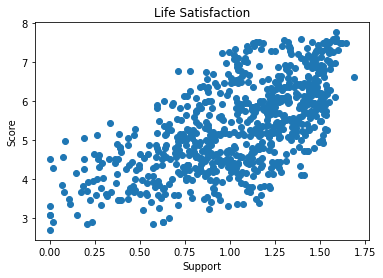

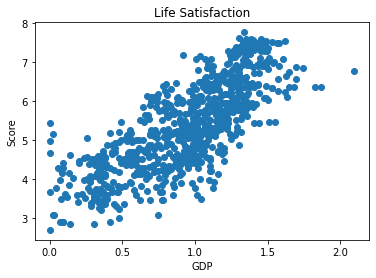

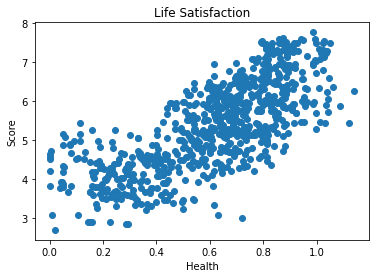

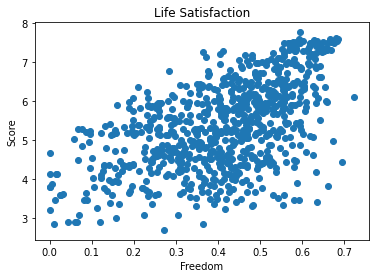

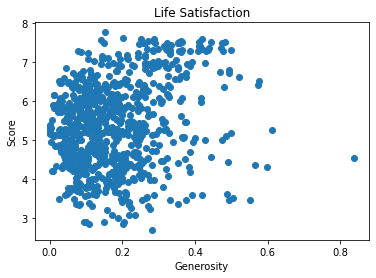

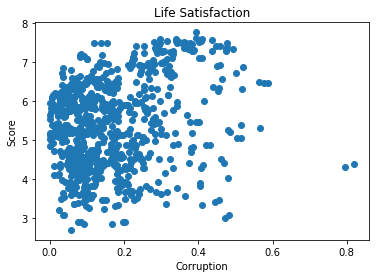

In [123]:
features = data[['Support','GDP','Health','Freedom','Generosity','Corruption']]
for feature in features.keys() : 
    plt.scatter(data[feature],data['Score'])
    plt.title('Life Satisfaction')
    plt.xlabel(feature)
    plt.ylabel('Score')
    plt.show()

In [239]:
feature = ['Support','GDP']
n = len(feature)
x = np.array(data[feature]).reshape(-1,n)
X = np.hstack([np.ones((x.shape[0],1)),x])
Y = np.array(data['Score']).reshape(-1,1)
O = np.random.randn(n+1,1)

In [170]:
def model(X,O) :
    return np.dot(X,O)

In [87]:
def cost_function(X,Y,O) : 
    m = len(Y)
    return (1/(2*m))*np.sum((model(X,O)-Y)**2)

In [88]:
def grad(X,Y,O) :
    m = len(Y)
    return (1/m)*(X.T.dot(model(X,O) - Y))

In [89]:
def gradient_descent(X,Y,O,learning_rate,n_iterations) :
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations) :
        O = O - learning_rate * grad(X,Y,O)
        cost_history[i] = cost_function(X,Y,O)
    return O,cost_history

In [240]:
theta,cost_history = gradient_descent(X,Y,O,0.025,1000)
theta

array([[2.30271905],
       [1.44403206],
       [1.62898106]])

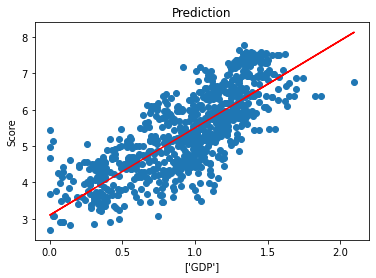

In [233]:
Y_predicat = model(X,theta)
plt.scatter(x,Y)
plt.plot(x,Y_predicat,color='r')
plt.title('Prediction')
plt.xlabel(feature)
plt.ylabel('Score')
plt.show()

In [221]:
def R2(Y,Y_predicat) :
    return 1 - ((Y - Y_predicat)**2).sum() / ((Y - Y_predicat.mean())**2).sum()
def MSE(Y,Y_predicat) :
    m = Y.shape[0]
    return 1/m * ((Y_predicat - Y)**2).sum()
def MAE(Y,Y_predicat) :
    m = Y.shape[0]
    return 1/m * np.abs(Y_predicat - Y).sum()

In [241]:
print('La Valeur de R^2', R2(Y,Y_predicat))
print('La valeur de MSE', MSE(Y,Y_predicat))
print('La valeur de MAE', MAE(Y,Y_predicat))

La Valeur de R^2 0.6018433087931527
La valeur de MSE 0.5055064642854086
La valeur de MAE 0.5785673602249467


In [242]:
model([1,1.3,1.3],theta)

array([6.29763611])